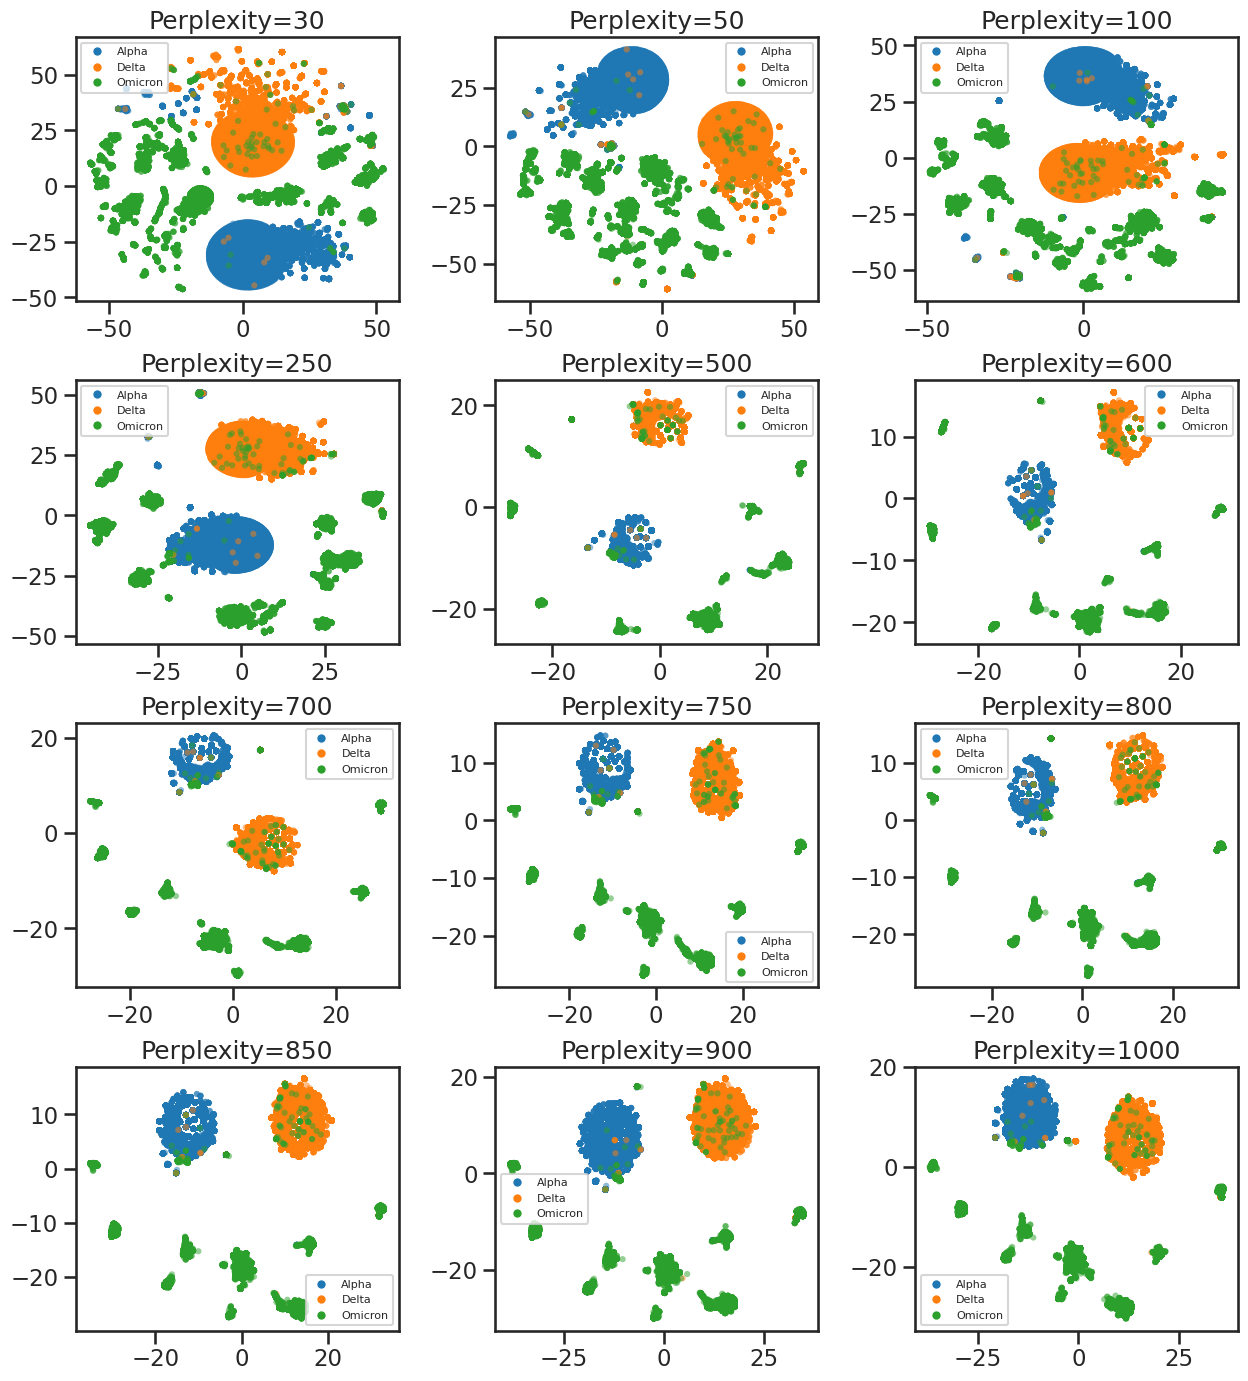

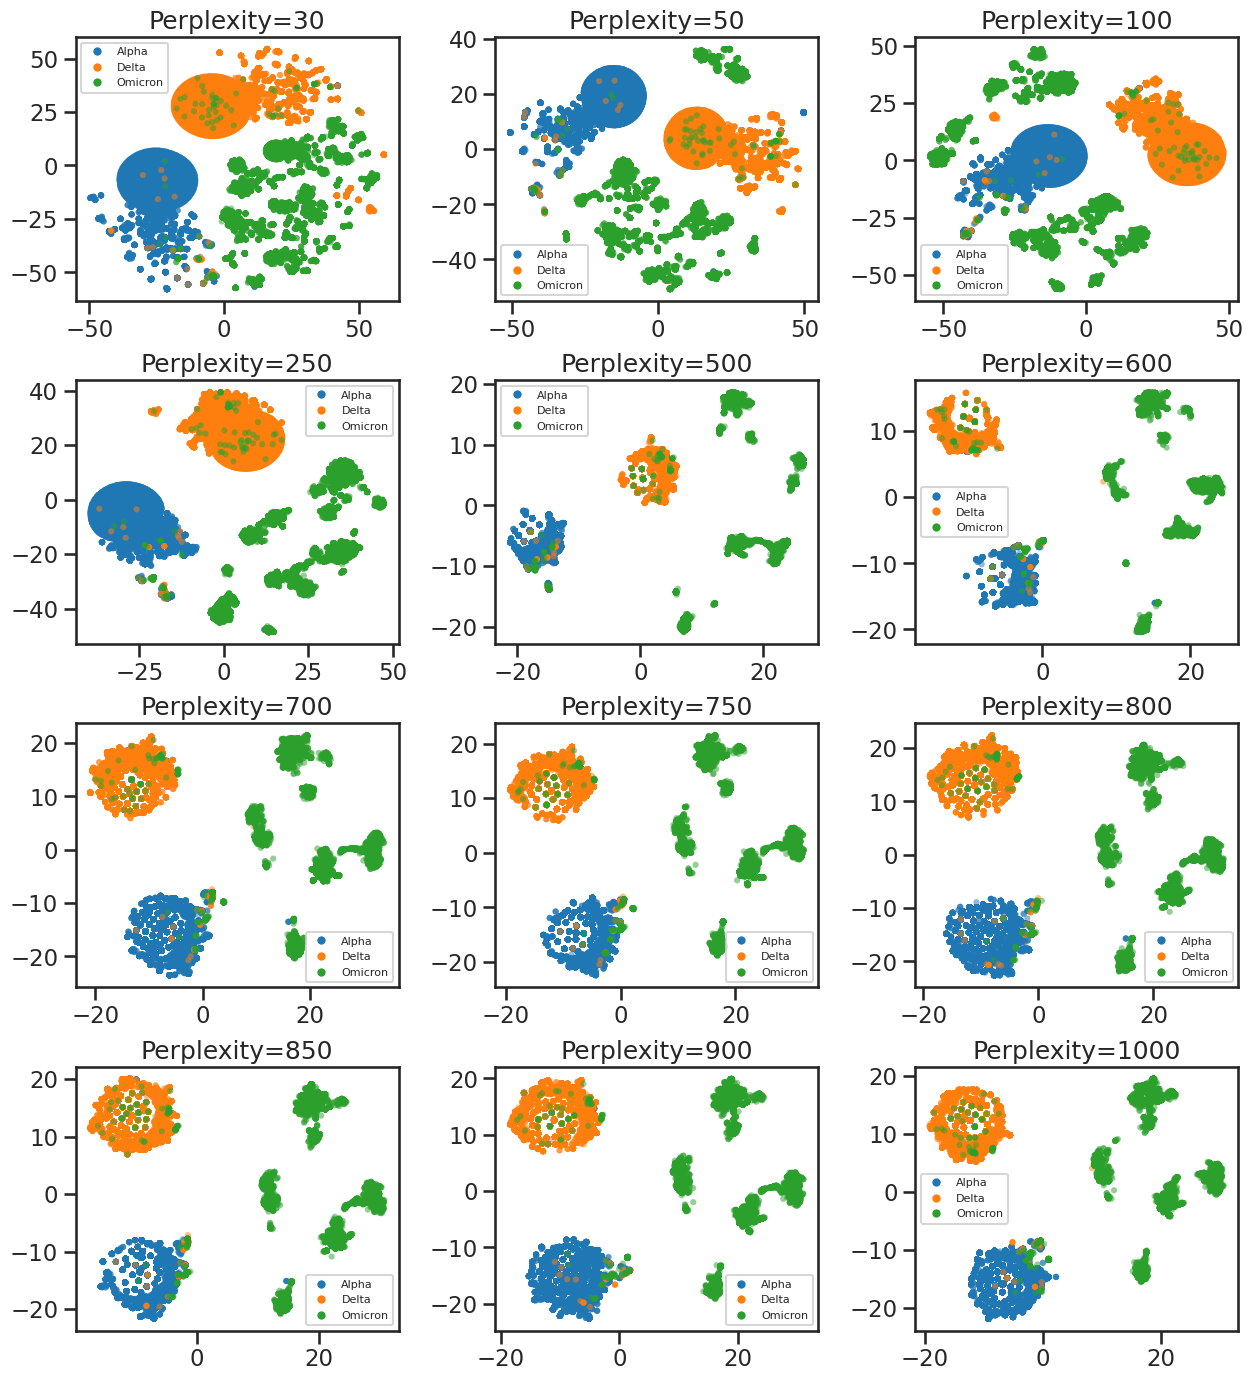

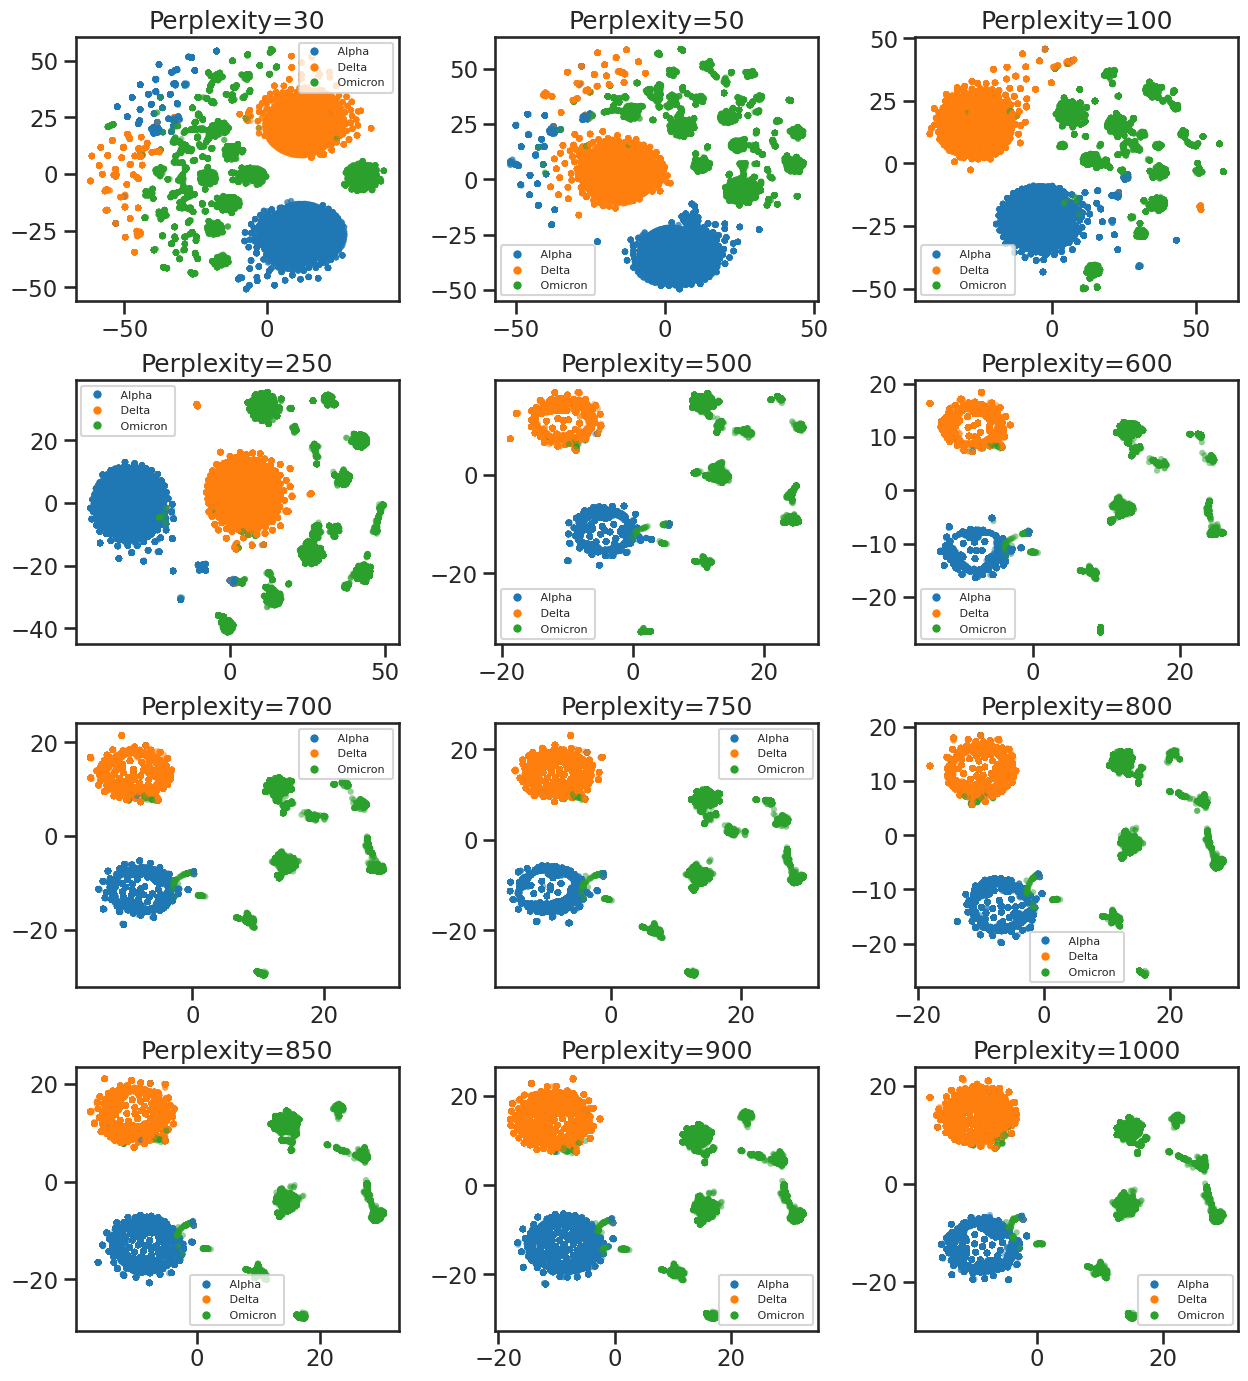

In [5]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from openTSNE import TSNE

def plot_perplexities(perp_list, folder, save_as, sampled):
    n_rows = 4
    n_cols = 3
    sns.set_style('ticks')
    sns.set_context("talk")
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4.2))
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    for ax, perp in zip(axes.flat, perp_list):

        seed = 0
        parquet_file = f"{folder}/RBD.ADO.{save_as}.{sampled}tSNE-perplexity{perp}.parquet"
        plot_df = pd.read_parquet(parquet_file, engine='fastparquet')

        unique_variants = np.unique(plot_df['Variant'])
        variant_color_palette = sns.color_palette("tab10", n_colors=len(unique_variants)) 
        variant_color_dict = {label: color for label, color in zip(unique_variants, variant_color_palette)}
        variant_colors = [variant_color_dict[v] for v in plot_df['Variant']]

        ax.scatter(
            plot_df['t-SNE component 1'], plot_df['t-SNE component 2'],
            c=variant_colors, s=20, alpha=0.5, edgecolor='none', linewidth=0,
            rasterized=True
        )
        ax.set_title(f'Perplexity={perp}')
        
        # Create per-plot legend
        handles = [
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=variant_color_dict[v], markersize=7)
            for v in unique_variants
        ]
        labels = unique_variants
        ax.legend(handles, labels, loc='best', fontsize=8, title_fontsize=9)

    save_as = f"perplexity_plots/RBD.ADO.{save_as}.tSNE-perplexities"
    plt.savefig(f"{save_as}.pdf", format="pdf", dpi=600, bbox_inches='tight')
    plt.show()

seed = 0
perp_list = [30, 50, 100, 250, 500, 600, 700, 750, 800, 850, 900, 1000]

plot_perplexities(
    perp_list,
    "rbd_ado",
    "from-esm-mlm.CLS-embedded",
    f"sampled_seed{seed}."   
)
plot_perplexities(
    perp_list,
    "rbd_ado",
    "CLS-embedded",
    f"sampled_seed{seed}."   
)
plot_perplexities(
    perp_list,
    "rbd_ado_msa",
    "MSA",
    ""   
)

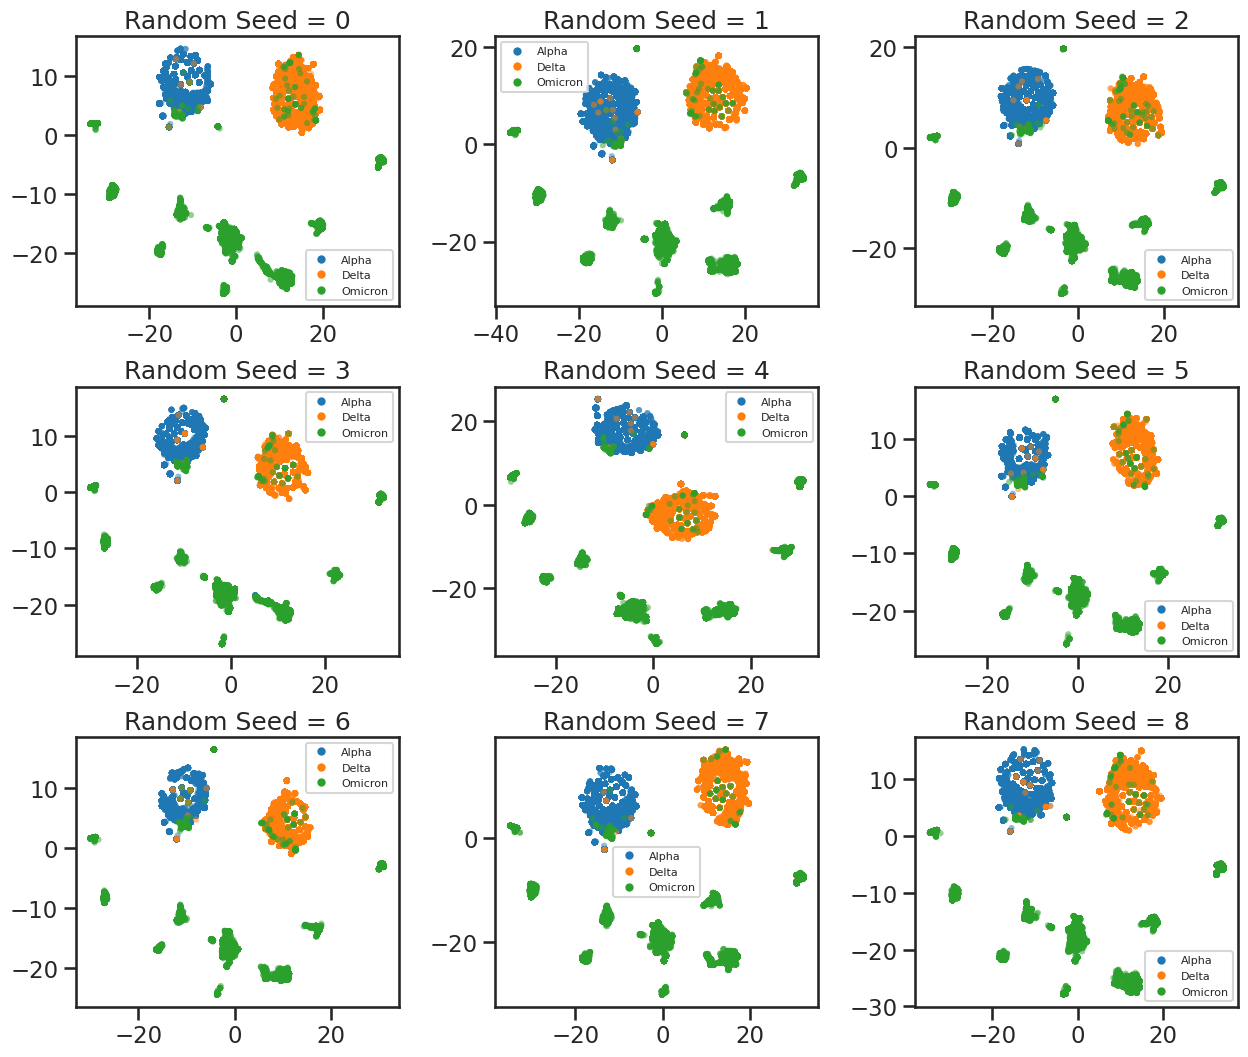

In [9]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from openTSNE import TSNE

def plot_seeds(perp, seed_list):
    n_rows = 3
    n_cols = 3
    sns.set_style('ticks')
    sns.set_context("talk")
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4.2))
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    for ax, seed in zip(axes.flat, seed_list):
        parquet_file = f"rbd_ado/RBD.ADO.from-esm-mlm.CLS-embedded.sampled_seed{seed}.tSNE-perplexity{perp}.parquet"
        plot_df = pd.read_parquet(parquet_file, engine='fastparquet')

        unique_variants = np.unique(plot_df['Variant'])
        variant_color_palette = sns.color_palette("tab10", n_colors=len(unique_variants)) 
        variant_color_dict = {label: color for label, color in zip(unique_variants, variant_color_palette)}
        variant_colors = [variant_color_dict[v] for v in plot_df['Variant']]

        ax.scatter(
            plot_df['t-SNE component 1'], plot_df['t-SNE component 2'],
            c=variant_colors, s=20, alpha=0.5, edgecolor='none', linewidth=0,
            rasterized=True
        )
        ax.set_title(f'Random Seed = {seed}')
        
        # Create per-plot legend
        handles = [
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=variant_color_dict[v], markersize=7)
            for v in unique_variants
        ]
        labels = unique_variants
        ax.legend(handles, labels, loc='best', fontsize=8, title_fontsize=9)

    save_as = f"perplexity_plots/RBD.ADO.from-esm-mlm.CLS-embedded.sampled_seeds_0-9.tSNE-perplexity{perp}"    
    plt.savefig(f"{save_as}.pdf", format="pdf", dpi=600, bbox_inches='tight')
    plt.show()

plot_seeds(
    perp = 750,
    seed_list = range(0,10)
)